In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer,normalize
from sklearn.preprocessing import StandardScaler, scale

In [4]:
driver_df = pd.read_csv('Datasets/data_1024.csv', delimiter='\t')

In [8]:
driver_df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


In [9]:
driver_df = driver_df[['Distance_Feature', 'Speeding_Feature']]

In [10]:
driver_df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [11]:
driver_df = driver_df.astype(np.float32)

driver_df.dtypes

Distance_Feature    float32
Speeding_Feature    float32
dtype: object

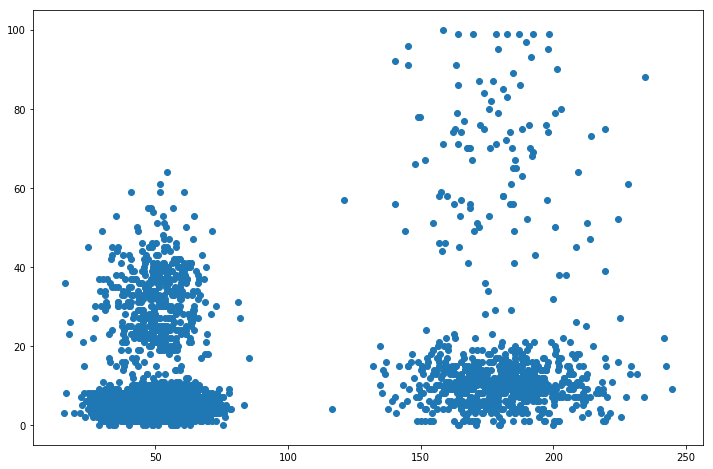

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(driver_df['Distance_Feature'], driver_df['Speeding_Feature'])

In [28]:
normalized_l2_df = pd.DataFrame(normalize(driver_df, norm='l2'), columns=driver_df.columns)

normalized_l2_df.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


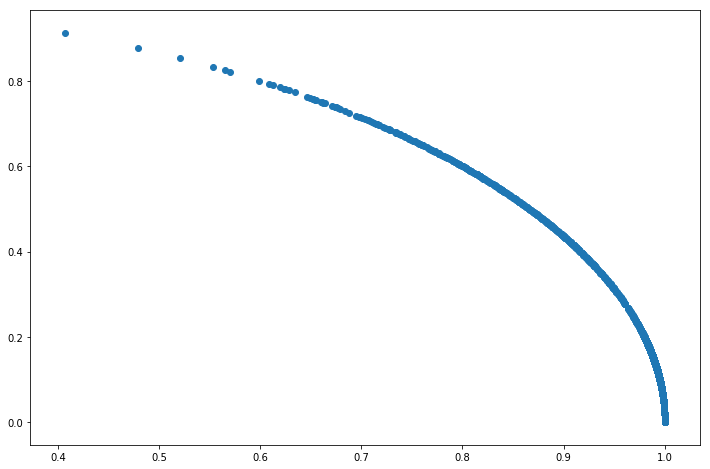

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(normalized_l2_df['Distance_Feature'], normalized_l2_df['Speeding_Feature'])

In [35]:
normalized_l2_df['L2'] = normalized_l2_df['Distance_Feature'] * normalized_l2_df['Distance_Feature'] + \
        normalized_l2_df['Speeding_Feature'] * normalized_l2_df['Speeding_Feature']

normalized_l2_df.head()

,Distance_Feature,Speeding_Feature,L2
0,0.930694,0.365798,1.0
1,0.902956,0.429733,1.0
2,0.922526,0.385934,1.0
3,0.930058,0.367414,1.0
4,0.909165,0.416437,1.0


In [36]:
normalized_l1_df = pd.DataFrame(normalize(driver_df, norm='l1'), columns=driver_df.columns)

normalized_l1_df.head()

,Distance_Feature,Speeding_Feature
0,0.717856,0.282144
1,0.677544,0.322456
2,0.705047,0.294953
3,0.716823,0.283177
4,0.685851,0.314149


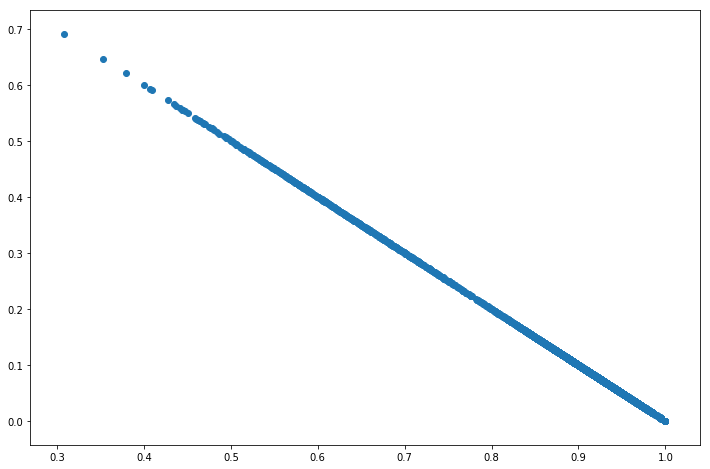

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(normalized_l1_df['Distance_Feature'], normalized_l1_df['Speeding_Feature'])

In [38]:
normalized_l1_df['L1'] = normalized_l1_df['Distance_Feature']  + \
        normalized_l1_df['Speeding_Feature']

normalized_l1_df.head()

,Distance_Feature,Speeding_Feature,L1
0,0.717856,0.282144,1.0
1,0.677544,0.322456,1.0
2,0.705047,0.294953,1.0
3,0.716823,0.283177,1.0
4,0.685851,0.314149,1.0


In [39]:
normalized_max_df = pd.DataFrame(normalize(driver_df, norm='max'), columns=driver_df.columns)

normalized_max_df.head()

,Distance_Feature,Speeding_Feature
0,1.0,0.393038
1,1.0,0.475919
2,1.0,0.418345
3,1.0,0.395044
4,1.0,0.458043


In [42]:
normalized_max_df.sample(10)

,Distance_Feature,Speeding_Feature
2700,1.0,0.105152
936,1.0,0.075643
3246,1.0,0.458985
3123,1.0,0.113071
3072,1.0,0.089908
1175,1.0,0.067879
1440,1.0,0.131119
1960,1.0,0.109963
215,1.0,0.560224
1517,1.0,0.097670


In [45]:
normalizer = Normalizer(copy=True, norm='l2')

normalized_array = normalizer.fit_transform(driver_df)

normalized_df = pd.DataFrame(normalized_array, columns=driver_df.columns)

normalized_df.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437
